In [13]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
from configs import Prometheus, Prometheus_launch_conditions
from rocketpy import Environment, Flight, Rocket, GenericMotor

## RocketPy Simulation


### Environment


In [14]:
# Environment conditions
env = Environment(
    latitude=32.99028,
    longitude=-106.96972,
    date=(2022, 6, 24, 13),
    elevation=1401
)
# may want to add wind
env.set_atmospheric_model(
    type="standard_atmosphere" #TBU
)


Gravity Details

Acceleration of gravity at surface level:    9.7913 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5534 m/s²


Launch Site Details

Launch Date: 2022-06-24 13:00:00 UTC
Launch Site Latitude: 32.99028°
Launch Site Longitude: -106.96972°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315961.92 W    3651932.28 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1401.0 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km


Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 855.92 hPa
Surface Temperature: 279.06 K
Surface Air Density: 1.068 kg/m³
Surface Speed of Sound: 334.54 m/s


Earth Model Details

Earth Radius at Launch site: 6371.83 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



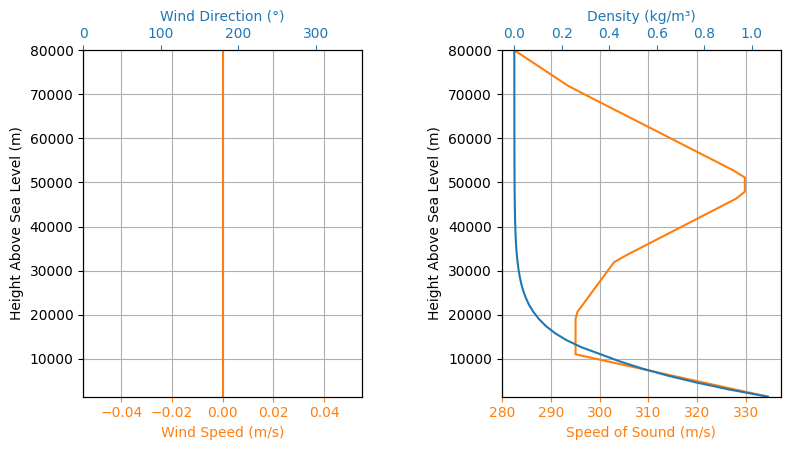

In [15]:
env.info()

### Motor


In [16]:
thrust_dict = Prometheus.motor.thrust_curve
def thrust_curve(t):
    time_list = list(thrust_dict.keys())
    thrust_list = list(thrust_dict.values())
    if t < time_list[0]:
        return thrust_list[0]
    elif t > time_list[-1]:
        return 0
    else:
        return np.interp(t, time_list, thrust_list)

motor_M1520 = GenericMotor(
    # burn specs:
    thrust_source=thrust_curve,
    burn_time=Prometheus.motor.burn_time,
    propellant_initial_mass=Prometheus.motor.fuel_mass_curve[0],
    dry_mass=Prometheus.motor.dry_mass,

    # geometry specs: Pro98 3G Gen2 casing 
    coordinate_system_orientation="nozzle_to_combustion_chamber",
    chamber_radius=0.064,
    chamber_height=0.548,
    chamber_position=0.274,
    nozzle_radius=0.027,
)

Motor Details
Total Burning Time: 4.897 s
Total Propellant Mass: 3.737 kg
Average Propellant Exhaust Velocity: 2017.369 m/s
Average Thrust: 1539.495 N
Maximum Thrust: 1821.9999786750636 N at 1.6989591836734694 s after ignition.
Total Impulse: 7538.907 Ns



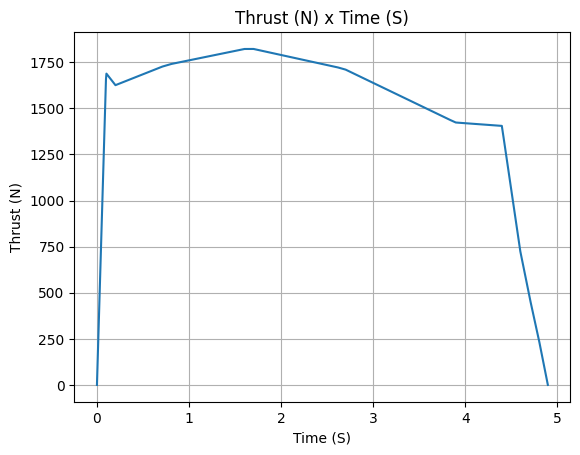

In [17]:
motor_M1520.info()

### Rocket


Create the `Rocket` object


In [18]:
Prometheus_RP = Rocket(
    radius = 0.06985, # 5.5" diameter circle
    mass = Prometheus.rocket_mass,
    inertia=(
        4.87,
        4.87,
        0.05,
    ),
    power_off_drag=Prometheus.Cd_rocket_at_Ma,
    power_on_drag=Prometheus.Cd_rocket_at_Ma,
    center_of_mass_without_motor=0.9549,
    coordinate_system_orientation="tail_to_nose",
)

Prometheus_RP.set_rail_buttons(0.69, 0.21, 60)

Prometheus_RP.add_motor(motor=motor_M1520, position=0)

Add aerodynamic surfaces


In [19]:
nose_cone = Prometheus_RP.add_nose(
    length=0.742,
    kind="Von Karman",
    position=2.229
)

fin_set = Prometheus_RP.add_trapezoidal_fins(
    3,
    span=0.13,
    root_chord=0.268,
    tip_chord=0.136,
    position=0.273,
    sweep_length=0.066,
)

Add Parachutes


In [20]:
drogue = Prometheus_RP.add_parachute(
    "Drogue",
    cd_s=1.6*np.pi*0.3048**2, # Cd = 1.6, D_chute = 24 in
    trigger="apogee",
)
main = Prometheus_RP.add_parachute(
    "Main",
    cd_s=2.2*np.pi*0.9144**2, # Cd = 2.2, D_chute = 72 in
    trigger=457.2, # 1500 ft
)

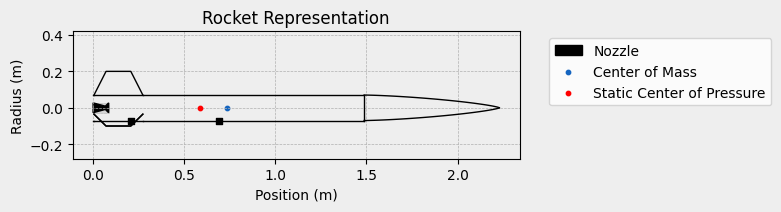

In [21]:
Prometheus_RP.draw()

In [22]:
Prometheus_RP.info()


Inertia Details

Rocket Mass: 13.930 kg (without motor)
Rocket Dry Mass: 16.911 kg (with unloaded motor)
Rocket Loaded Mass: 20.648 kg (with loaded motor)
Rocket Inertia (with unloaded motor) 11: 6.008 kg*m2
Rocket Inertia (with unloaded motor) 22: 6.008 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.050 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.06985 m
Rocket Frontal Area: 0.015328 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.120 m
Rocket Center of Dry Mass - Nozzle Exit: 0.835 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.561 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.102 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 6.406/rad

Center of Pressure

Nose Cone Center o

### Flight


In [23]:
# Flight
flight = Flight(
    rocket=Prometheus_RP,
    environment = env,
    rail_length = Prometheus_launch_conditions.L_launch_rail,
    inclination = Prometheus_launch_conditions.launch_angle,
    terminate_on_apogee=False,
)

Apogee: 5449.31 m ASL, 4048.31 m AGL

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1401.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.704 | e1: -0.062 | e2: 0.062 | e3: -0.704
Euler Angles - Spin φ : 0.00° | Nutation θ: -10.00° | Precession ψ: -90.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: 0.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


Launch Rail

Launch Rail Length: 5.18  m
Launch Rail Inclination: 80.00°
Launch Rail Heading: 90.00°


Rail Departure State

Rail Departure Time: 0.411 s
Rail Departure Velocity: 25.207 m/s
Rail Departure Stability Margin: 1.090 c
Rail Departure Angle of Attack: 0.000°
Rail Departure Thrust-Weight Ratio: 8.353
Rail Departure Reynolds Number: 2.158e+05


Burn out State

Burn out time: 4.897 s
Altitude at burn out: 859.376 m (AGL)
Rocket velocity at burn out: 324.516 m/s
Freestream velocity at burn out: 324.516 m/s
Mach Number at b

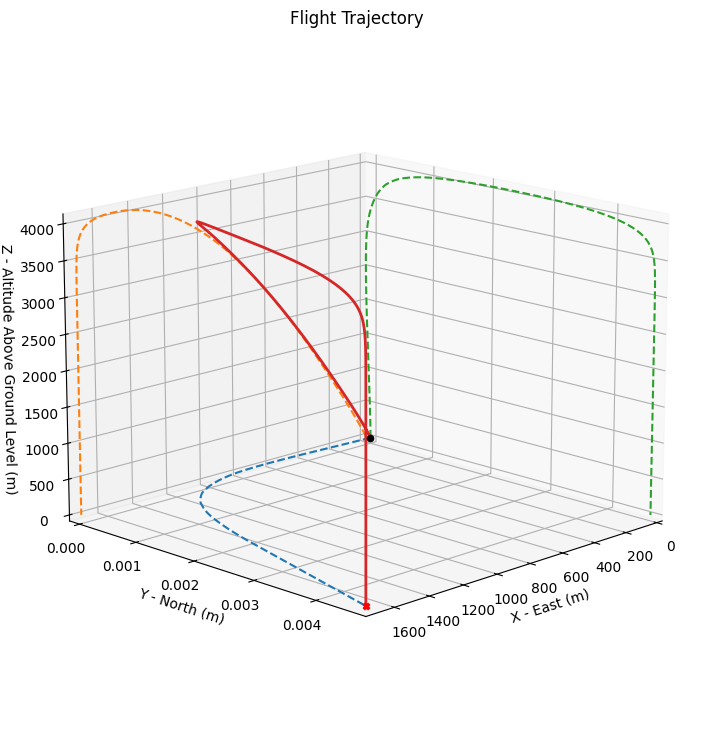

In [24]:
print(f"Apogee: {round(flight.apogee,2)} m ASL, {round(flight.apogee - env.elevation,2)} m AGL")
flight.info()
flight.plots.trajectory_3d()